In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


df = pd.read_csv("rfSampleData_DEG_urine.csv")
# Split the data into training and testing sets
df1 = df.loc[(df['Condition'] == 'Invasive') | (df['Condition'] == 'NonInvasive')]

# Separate features and target variable
X = df1.iloc[:,1:-1]
y = df1.iloc[:,-1]

# X_test = X.iloc[:4,:]
# X_train = X.iloc[4:17,:]

X_he_test = X.iloc[[8,9,11,12],:]

y_he_test = y.iloc[[8,9,11,12]]

X_he_train = X.iloc[[4,5,6,7,13,14,15,16,17,18,19],:]
y_he_train = y.iloc[[4,5,6,7,13,14,15,16,17,18,19]]

# y_test = y.iloc[:4]
# y_train = y.iloc[4:17]

# y_combine = y_test.append(y_valid)
# X_combine = X_test.append(X_valid)

X_he_train.head(24)


/Users/jonathankahn/anaconda3/envs/tf/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/jonathankahn/anaconda3/envs/tf/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta

,SCN4A,UBR2,FAM120A,DYNLL1,MSH2,CDHR5,LPIN2,WNT2,SNX8,NRBP1,...,FOXO4,MAGED4B,PRKAR1B,RYR1,SDHAF3,C20ORF203,ABCF1,CHUK,CELA3B,BAHCC1
8,7.403666,6.927949,5.106112,5.418460,5.576628,5.763212,6.110997,6.685121,5.675615,6.365046,...,4.810548,5.370786,5.671491,6.524755,6.672230,6.855611,2.808315,3.733204,5.718854,6.927417
9,5.916814,4.209897,7.044033,3.128604,3.222554,2.788385,4.487029,3.438067,7.545193,5.022073,...,4.245204,3.481885,5.671491,5.751741,3.969496,6.159634,2.808315,5.799739,5.436034,7.708259
10,6.608161,6.312869,6.477228,5.418460,3.222554,3.939205,3.258545,6.536544,5.675615,6.365046,...,5.777009,6.067923,4.504762,5.138165,4.581110,5.960588,2.808315,7.026627,2.939456,6.008621
11,7.848260,7.049371,3.570345,5.418460,3.222554,2.788385,3.258545,3.438067,7.244258,4.464689,...,4.810548,2.290122,5.364601,4.702826,2.923936,7.143744,5.049034,7.293238,2.939456,6.381629
17,6.310512,5.866101,5.936282,5.459068,3.885460,1.444412,5.247839,5.995902,6.672962,5.999498,...,2.924971,1.883870,6.305075,6.623452,4.354926,6.342371,3.790017,5.867448,5.290578,6.589700
18,7.324102,6.594620,6.835399,4.698007,3.349241,4.324150,4.417036,6.246587,6.712729,6.464880,...,4.744569,1.883870,4.741919,6.940414,3.769294,7.105288,4.723824,5.622162,1.269074,7.272885
19,6.257609,6.173596,3.425257,5.947243,4.171567,4.613772,4.686931,4.457737,5.422867,6.348094,...,5.729201,2.693883,5.479356,7.059727,1.247999,5.448413,3.377756,5.583894,3.536363,5.693854
20,7.143082,7.255514,5.825150,5.830247,4.707786,4.613772,5.054841,5.205505,7.250468,6.197567,...,5.029626,5.933934,6.209723,6.971287,3.569562,6.146225,1.405803,6.894099,6.293075,4.116036
21,6.230431,7.057873,5.427335,3.177932,1.040682,1.444412,1.015323,2.999600,5.513269,6.312335,...,3.759936,6.134759,6.184643,5.484308,1.247999,6.146225,1.405803,6.051757,5.342234,6.724866
22,7.866732,6.730933,7.586877,6.307379,3.885460,4.696628,5.906990,6.572714,7.277581,6.791647,...,4.663374,7.061729,6.552427,7.429174,5.253029,6.932088,2.751871,6.894099,4.994962,6.864104


In [2]:
# RF on DEG for Urine
# Grid Search --> 5 estimators, 200 features
# Fit model on training data (urine samples)
# Predicted on subset of urine samples (in this iteration)

# Generate a bunch of models w/ different random states
    # Look at genes used to split
    # Make a table [Model (Labeled by Random State), List of Genes used to Split]

from sklearn.tree import export_graphviz, export_text
from subprocess import call
from IPython.display import Image

import re

def extract_unique_genes(text):
    unique_strings = set()
    extracted_strings = []
    matches = re.findall(r'\|---\s+([^|<>=]+)(?=\s*[<>=])', text)
    
    # Iterate through the matches and keep only the first occurrence of each unique string
    for match in matches:
        if match[:-1] not in unique_strings:
            unique_strings.add(match[:-1])
            extracted_strings.append(match[:-1])
    
    return extracted_strings

def counter_dict(input_list):
    counter_dict = {}
    for item in input_list:
        if item in counter_dict:
            counter_dict[item] += 1
        else:
            counter_dict[item] = 1
    return counter_dict    

current = 0
randomStateTracker = []
pathways = []
results = pd.DataFrame()
shapValStore_Train = []
shapValStore_Test = []
randomStates = [1256, 1324, 1330, 1339, 1374, 1378, 1382, 1385, 1417, 1458]

for rst in randomStates:
    rf_model = RandomForestClassifier(n_estimators=5, max_features=200, random_state=rst)
    #clf = GridSearchCV(rf_model, parameters, cv=[(slice(None), slice(None))])
    #clf.fit(X_train,y_train)
    #print(sorted(clf.cv_results_.keys()))

    rf_model.fit(X_he_train, y_he_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_he_test)
    #y_pred = clf.predict(X_test)

    # Evaluate the model
    current+=1
    num = 1

    explainer = shap.TreeExplainer(rf_model)
    shap_values_train = explainer.shap_values(X_he_train)
    shapValStore_Train.append(shap_values_train)
    shap_values_test = explainer.shap_values(X_he_test)
    shapValStore_Test.append(shap_values_test)
    
    for estimator in rf_model.estimators_:
    # Export as dot file
        export_graphviz(estimator, out_file='tree.dot', 
                        feature_names = X.columns.to_list(),
                        class_names = ["Invasive", "NonInvasive"],
                        rounded = True, proportion = False, 
                        precision = 2, filled = True)
        #print(export_text(estimator, feature_names = X.columns.to_list()))
        
        # Grab Genes used in decision tree's pathway
        genes = extract_unique_genes(export_text(estimator, feature_names = X.columns.to_list()))
        pathways.extend(genes)
        # Make row to add to DF
        row = [f"tree_{current}_{num}",rst,genes]
        row = pd.DataFrame([row], columns=["Tree", "Random State", "Genes Present"])
        results = pd.concat([results,row])
            
        # Convert to png using system command (requires Graphviz)
            #call(['dot', '-Tpng', 'tree.dot', '-o', f'rf_model_{current}_{rst}_tree_{num}.png', '-Gdpi=600'])
            # Display in jupyter notebook
            #Image(filename = f'rf_model_{current}_{rst}_tree_{num}.png')
        num+=1

geneCount = counter_dict(pathways)
#print(pathways)
results.head(50)

['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1256
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1324
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1330
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1339
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1374
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1378
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1382
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1385
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1417
['Invasive' 'Invasive' 'Invasive' 'Invasive']
Random State: 1458


,Tree,Random State,Genes Present
0,tree_1_1,1256,[MAGED4B]
0,tree_1_2,1256,[TMEM123]
0,tree_1_3,1256,[ARFIP1]
0,tree_1_4,1256,[NMBR]
0,tree_1_5,1256,[GXYLT2]
0,tree_2_1,1324,[WNT2]
0,tree_2_2,1324,[UFC1]
0,tree_2_3,1324,[UFC1]
0,tree_2_4,1324,[SEC24D]
0,tree_2_5,1324,[NMBR]


In [3]:
# Gene Occurrence Counter
geneCount_list = list(geneCount.items())
geneCountDF = pd.DataFrame(geneCount_list, columns=['Gene', 'Count']).sort_values("Count", ascending=False)
geneCountDF.head(50)

,Gene,Count
3,NMBR,5
6,UFC1,5
11,SDHAF3,5
1,TMEM123,5
19,SCN4A,4
12,BBS7,3
5,WNT2,3
2,ARFIP1,2
4,GXYLT2,2
7,SEC24D,2


(10, 2, 11, 53)
(2, 11, 53)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


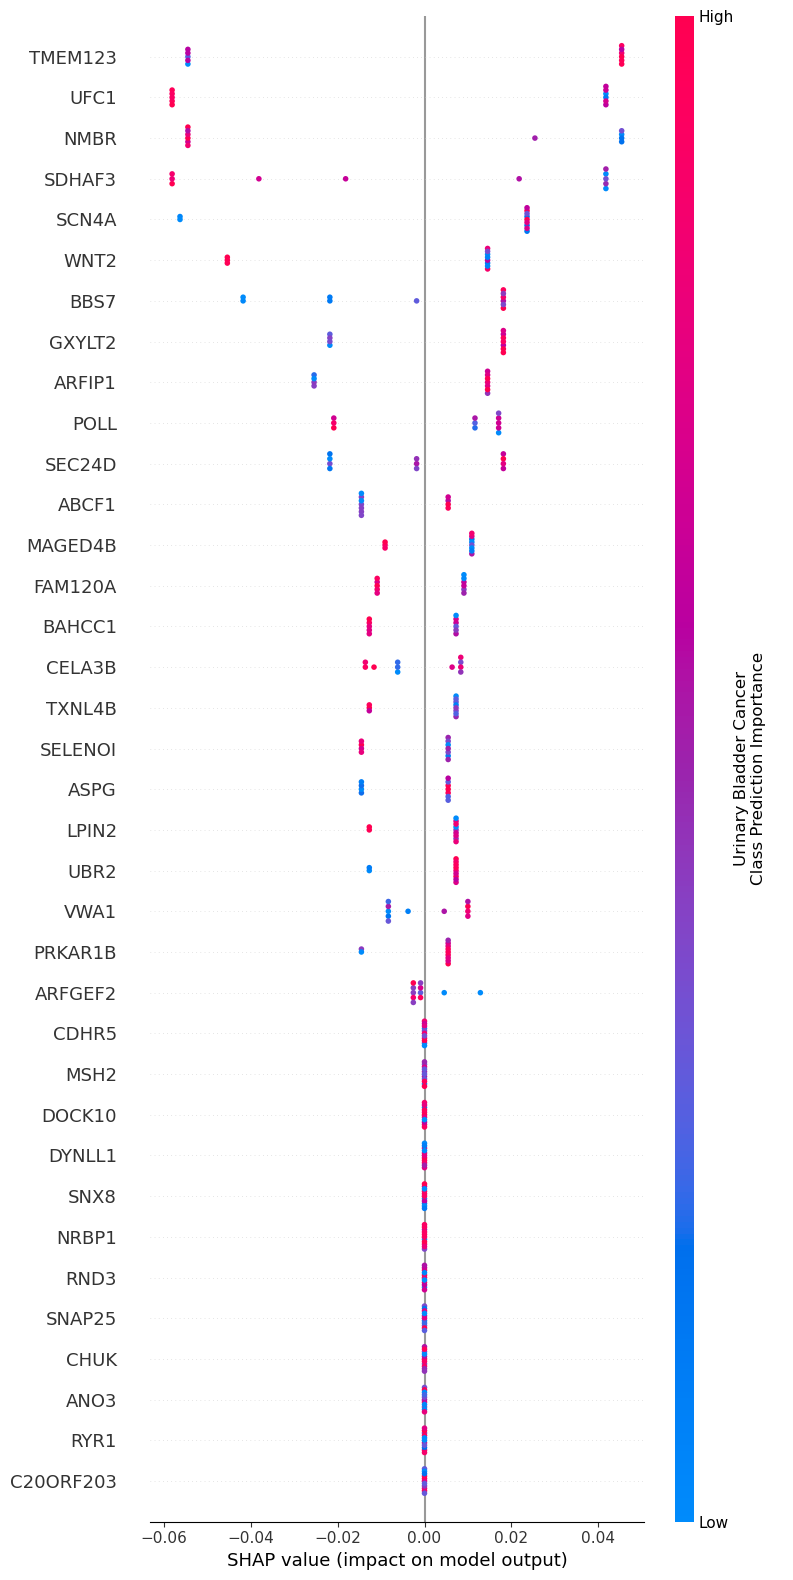

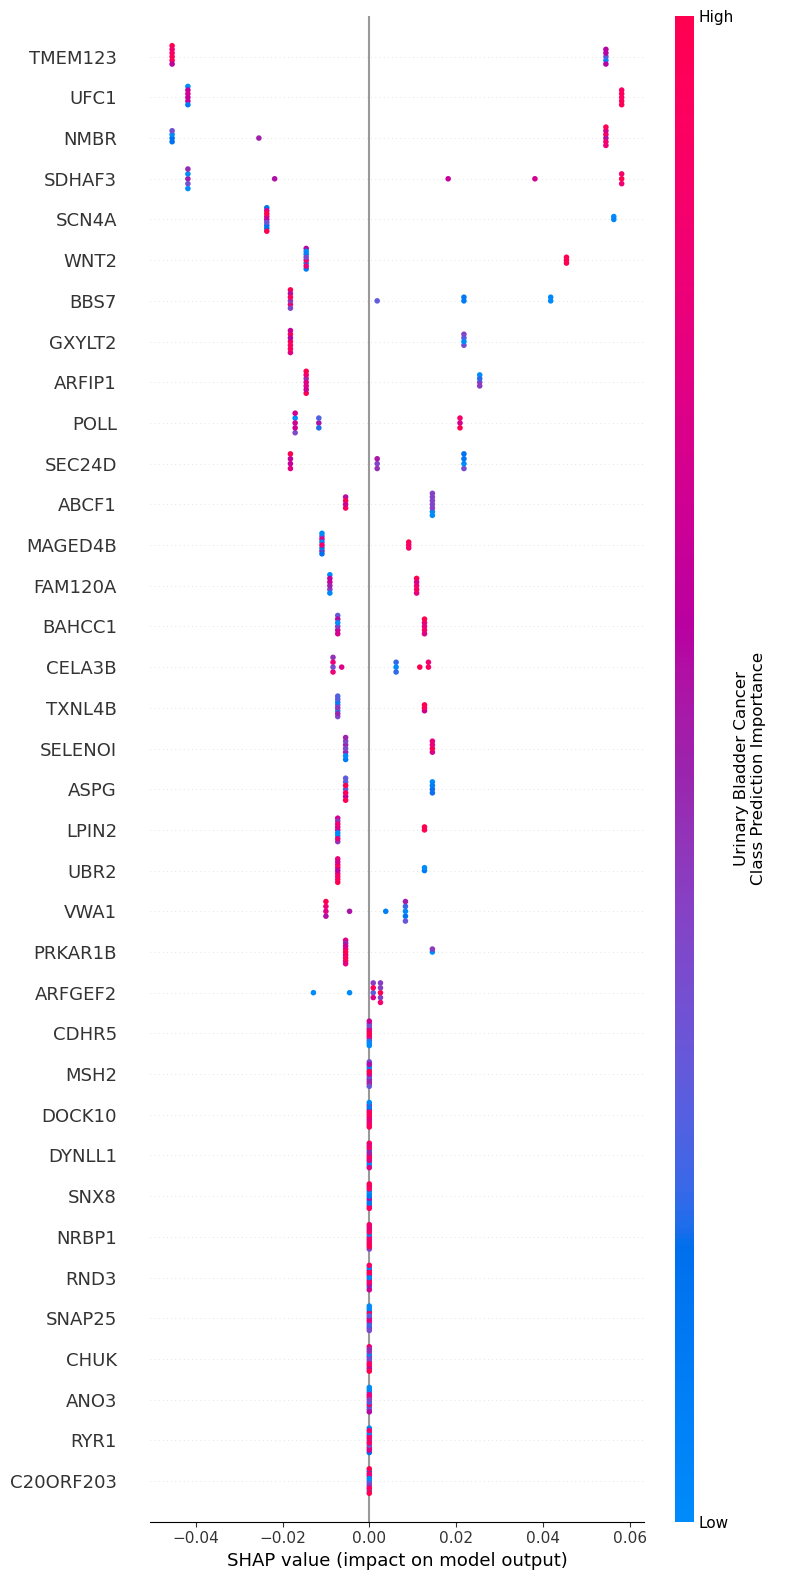

In [4]:
# Shapely Values Training

shapValStore_Train
np_shap_vals_train = np.array(shapValStore_Train)

print(np.shape(np_shap_vals_train))
np_shap_vals_train = np.mean(np_shap_vals_train, axis=0)

print(np.shape(np_shap_vals_train))

#non invasive
shap.summary_plot(np_shap_vals_train[0], X_he_train, 
                  plot_type="dot", 
                  max_display=36, 
                  color_bar_label='Urinary Bladder Cancer\nClass Prediction Importance\n',
)

#invasive to check
shap.summary_plot(np_shap_vals_train[1], X_he_train, 
                  plot_type="dot", 
                  max_display=36, 
                  color_bar_label='Urinary Bladder Cancer\nClass Prediction Importance\n',
)

(10, 2, 4, 53)
(2, 4, 53)


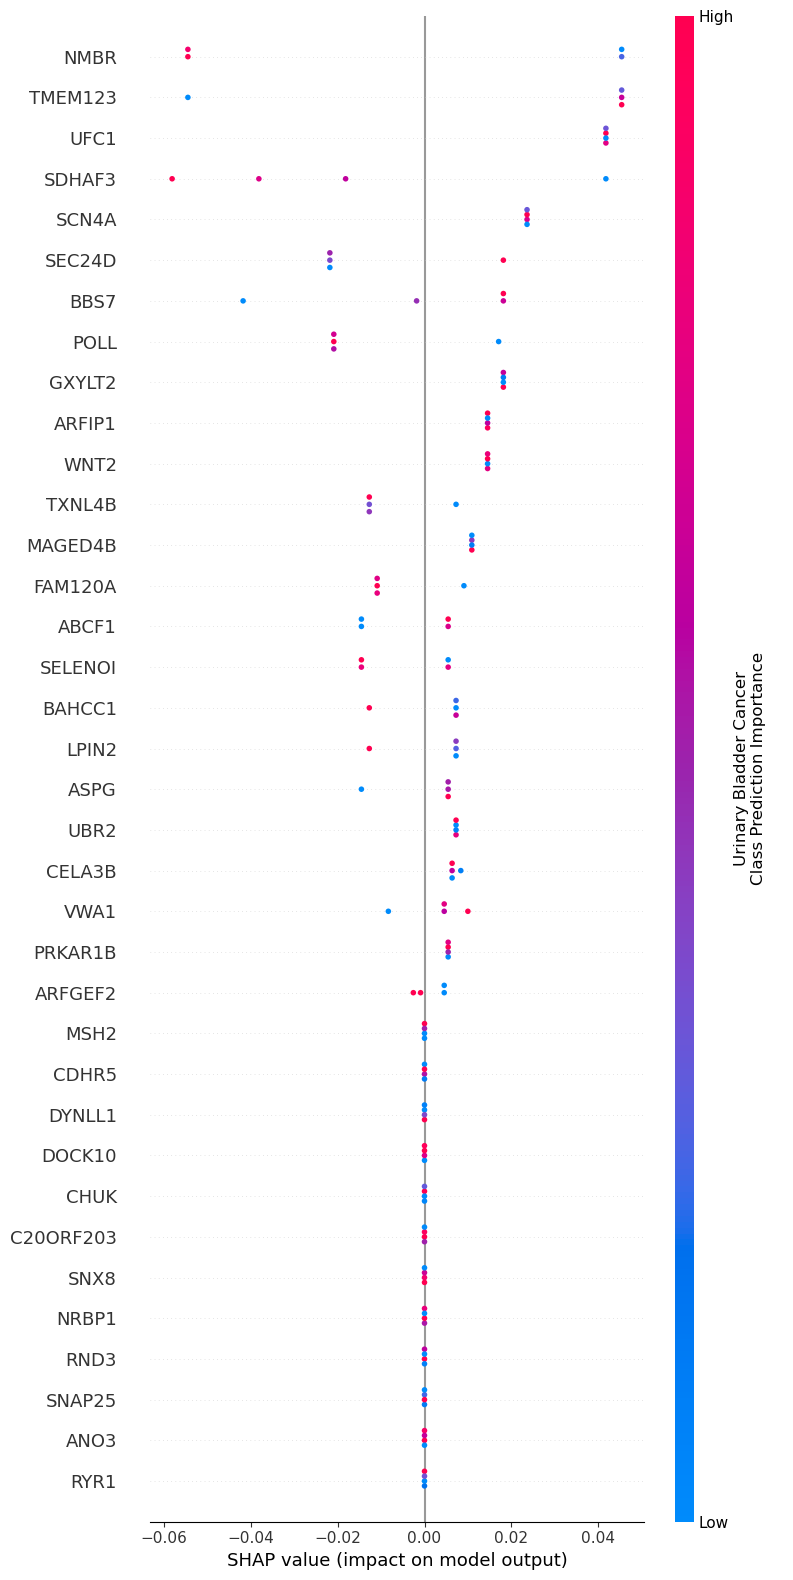

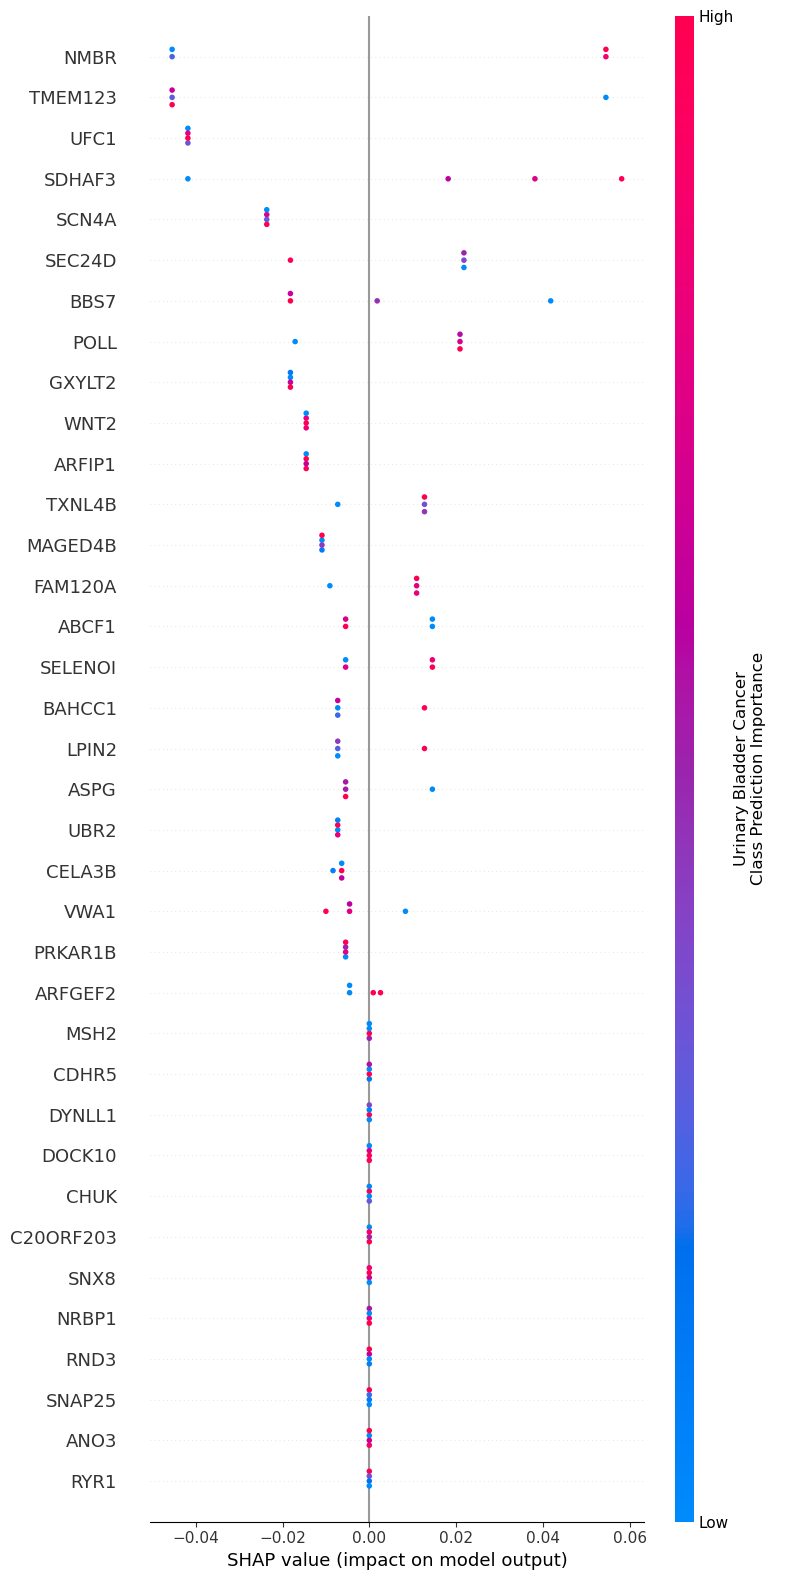

In [5]:
# Shapely Values Testing

shapValStore_Test
np_shap_vals_test = np.array(shapValStore_Test)

print(np.shape(np_shap_vals_test))
np_shap_vals_test = np.mean(np_shap_vals_test, axis=0)

print(np.shape(np_shap_vals_test))

#non invasive
shap.summary_plot(np_shap_vals_test[0], X_he_test, 
                  plot_type="dot", 
                  max_display=36, 
                  color_bar_label='Urinary Bladder Cancer\nClass Prediction Importance\n',
)

#invasive to check
shap.summary_plot(np_shap_vals_test[1], X_he_test, 
                  plot_type="dot", 
                  max_display=36, 
                  color_bar_label='Urinary Bladder Cancer\nClass Prediction Importance\n',
)